In [51]:
import matplotlib.pyplot as plt
import cirq_ionq
import random

def diffuse(circuit, n):
    for _ in range(n):
        circuit.append([cirq.H(qubit) for qubit in qubits])
        circuit.append([cirq.X(qubit) for qubit in qubits])
        circuit.append(cirq.Z(qubits[-1]).controlled_by(*qubits[0:-1]))
        circuit.append([cirq.X(qubit) for qubit in qubits])
        circuit.append([cirq.H(qubit) for qubit in qubits])
        
        

              ┌──────────┐   ┌────────┐
0: ───H───@─────────@─────────@───────────H───────X─────────────────────@───X───H───H───X───@───X───H───H───X───@───X───H───M('r1')───
          │         │         │                                         │                   │                   │           │
1: ───H───@────Z^0.2┼─────────┼────@──────────────@───────H─────X───────@───X───H───H───X───@───X───H───H───X───@───X───H───M─────────
                    │         │    │              │                     │                   │                   │           │
2: ───H─────────────@^0.8─────┼────@^0────────────┼───────@─────H───X───@───X───H───H───X───@───X───H───H───X───@───X───H───M─────────
                              │                   │       │             │                   │                   │           │
3: ───H───────────────────────@^0.2───────Z^0.2───@^0.4───@^0───H───X───Z───X───H───H───X───Z───X───H───H───X───Z───X───H───M─────────
              └──────────┘   └────────┘


<AxesSubplot: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

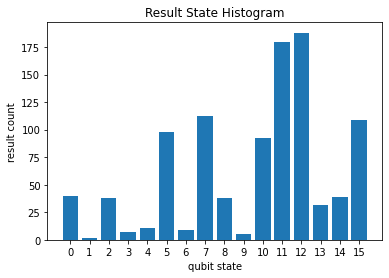

In [52]:
import cirq

qubits = [cirq.NamedQubit(str(ii)) for ii in range(4)]
circuit = cirq.Circuit()

circuit.append([cirq.H(qubit) for qubit in qubits])

# circuit.append(cirq.ZPowGate(exponent = 0.4)(qubits[-1]).controlled_by(*qubits[0:-1]))
# circuit.append(cirq.X(qubits[-1]))
# circuit.append(cirq.Z(qubits[-1]).controlled_by(*qubits[0:-1]))
# circuit.append(cirq.X(qubits[-1]))
# circuit.append(cirq.X(qubits[-1]))
# circuit.append(cirq.X(qubits[-2]))
# circuit.append(cirq.Z(qubits[-1]).controlled_by(*qubits[0:-1]))
# circuit.append(cirq.X(qubits[-2]))
# circuit.append(cirq.X(qubits[-1]))
# circuit.append(cirq.X(qubits[-1]))
# circuit.append(cirq.X(qubits[-2]))
# circuit.append(cirq.X(qubits[-3]))
# circuit.append(cirq.ZPowGate(exponent = 1/2)(qubits[-1]).controlled_by(*qubits[0:-1]))
# circuit.append(cirq.X(qubits[-3]))
# circuit.append(cirq.X(qubits[-2]))
# circuit.append(cirq.X(qubits[-1]))

circuit.append(cirq.CZPowGate(exponent = 1)(qubits[0], qubits[1]))
circuit.append(cirq.ZPowGate(exponent = 0.2)(qubits[1]))

circuit.append(cirq.CZPowGate(exponent = 0.8)(qubits[0], qubits[2]))
circuit.append(cirq.CZPowGate(exponent = 0.2)(qubits[0], qubits[3]))
circuit.append(cirq.ZPowGate(exponent = 0.2)(qubits[3]))
circuit.append(cirq.CZPowGate(exponent = 0)(qubits[1], qubits[2]))
circuit.append(cirq.CZPowGate(exponent = 0.4)(qubits[1], qubits[3]))
circuit.append(cirq.CZPowGate(exponent = 0)(qubits[2], qubits[3]))










diffuse(circuit, 3)

circuit.append(cirq.measure(*qubits, key = 'r1'))

print(circuit)
s = cirq.Simulator()
samples = s.run(circuit, repetitions = 1000)
#samples[0]
cirq.plot_state_histogram(samples, plt.subplot())

In [53]:
for ii in range(16):
    print(f'{format(ii, "2")} : {format(ii, "#06b")}')

 0 : 0b0000
 1 : 0b0001
 2 : 0b0010
 3 : 0b0011
 4 : 0b0100
 5 : 0b0101
 6 : 0b0110
 7 : 0b0111
 8 : 0b1000
 9 : 0b1001
10 : 0b1010
11 : 0b1011
12 : 0b1100
13 : 0b1101
14 : 0b1110
15 : 0b1111


In [54]:
circuit = cirq_ionq.decompose_to_device(circuit)

/tmp/ipykernel_16378/978515543.py:1: DeprecationWarning: decompose_to_device was used but is deprecated.
It will be removed in cirq v0.16.
Use cirq.optimize_for_target_gateset(circuit, gateset=cirq_ionq.IonQTargetGateset(atol)) instead.

  circuit = cirq_ionq.decompose_to_device(circuit)


In [55]:
print(circuit)

<generator object AbstractCircuit.all_operations.<locals>.<genexpr> at 0x7fbae1468f20>


In [56]:
qc = cirq.optimize_for_target_gateset(circuit, gateset=cirq_ionq.ionq_gateset.IonQTargetGateset())

AttributeError: 'generator' object has no attribute 'unfreeze'

In [57]:
type(qc)

NameError: name 'qc' is not defined

In [58]:
len(qc)

NameError: name 'qc' is not defined

In [59]:
from itertools import combinations

In [60]:
list(combinations(['a', 'b', 'c', 'd'], 2))

[('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'c'), ('b', 'd'), ('c', 'd')]

In [61]:
for qubit in qubits:
    print(qubit)


0
1
2
3


In [62]:
qubits

[cirq.NamedQubit('0'),
 cirq.NamedQubit('1'),
 cirq.NamedQubit('2'),
 cirq.NamedQubit('3')]

In [63]:
circuit = qc

NameError: name 'qc' is not defined

In [92]:
def build_monster_grover(exponents, nDiffuse, measure):
    qubits = [cirq.NamedQubit(str(ii)) for ii in range(5)]
    circuit = cirq.Circuit()

    # apply H-gates 
    circuit.append([cirq.H(qubit) for qubit in qubits])

    circuit.append(cirq.CZPowGate(exponent = exponents[0])(qubits[0], qubits[1]))
    # circuit.append(cirq.ZPowGate(exponent = exponents[])(qubits[1]))
    circuit.append(cirq.CZPowGate(exponent = exponents[1])(qubits[0], qubits[2]))
    circuit.append(cirq.CZPowGate(exponent = exponents[2])(qubits[0], qubits[3]))
    circuit.append(cirq.CZPowGate(exponent = exponents[3])(qubits[0], qubits[4]))
    # circuit.append(cirq.ZPowGate(exponent = exponents[])(qubits[3]))
    circuit.append(cirq.CZPowGate(exponent = exponents[4])(qubits[1], qubits[2]))
    circuit.append(cirq.CZPowGate(exponent = exponents[5])(qubits[1], qubits[3]))
    circuit.append(cirq.CZPowGate(exponent = exponents[6])(qubits[1], qubits[4]))
    circuit.append(cirq.CZPowGate(exponent = exponents[7])(qubits[2], qubits[3]))
    circuit.append(cirq.CZPowGate(exponent = exponents[8])(qubits[2], qubits[4]))
    circuit.append(cirq.CZPowGate(exponent = exponents[9])(qubits[3], qubits[4]))

    circuit.append([cirq.X(qubit) for qubit in qubits])
    
    circuit.append(cirq.CZPowGate(exponent = exponents[10])(qubits[0], qubits[1]))
    # circuit.append(cirq.ZPowGate(exponent = exponents[])(qubits[1]))
    circuit.append(cirq.CZPowGate(exponent = exponents[11])(qubits[0], qubits[2]))
    circuit.append(cirq.CZPowGate(exponent = exponents[12])(qubits[0], qubits[3]))
    circuit.append(cirq.CZPowGate(exponent = exponents[13])(qubits[0], qubits[4]))
    # circuit.append(cirq.ZPowGate(exponent = exponents[])(qubits[3]))
    circuit.append(cirq.CZPowGate(exponent = exponents[14])(qubits[1], qubits[2]))
    circuit.append(cirq.CZPowGate(exponent = exponents[15])(qubits[1], qubits[3]))
    circuit.append(cirq.CZPowGate(exponent = exponents[16])(qubits[1], qubits[4]))
    circuit.append(cirq.CZPowGate(exponent = exponents[17])(qubits[2], qubits[3]))
    circuit.append(cirq.CZPowGate(exponent = exponents[18])(qubits[2], qubits[4]))
    circuit.append(cirq.CZPowGate(exponent = exponents[19])(qubits[3], qubits[4]))
    
    diffuse(circuit, nDiffuse)
    
    if measure:
        circuit.append(cirq.measure(*qubits, key = 'r1'))
    
    return circuit

[9.9 7.7 2.4 2.7 4.1 7.4 0.6 0.6 1.  0.1 7.6 0.5 0.  6.2 0.5 3.6 9.1 3.
 0.8 0.1 3.8 0.8 0.4 8.7 2.  0.9 3.4 1.3 0.7 8.  1.6 0.5]


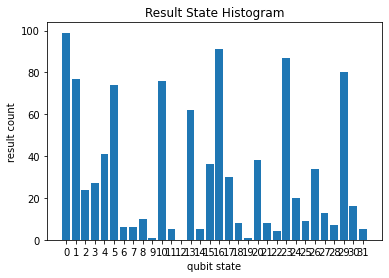

In [112]:
numExponents = 20
numRepititions = 1000
exponents = [random.random() for _ in range(numExponents)]
nDiffuse = 1

# initial circuit
circuit = build_monster_grover(exponents, nDiffuse, measure=True)
s = cirq.Simulator()
samples = s.run(circuit, repetitions = numRepititions)
cirq.plot_state_histogram(samples, plt.subplot())

counts = cirq.get_state_histogram(samples)
percentages = counts/numRepititions * 100
print(percentages)
# list(cirq.get_state_histogram(samples))
prev_prob_sum = percentages[0]+percentages[1]+percentages[2]+percentages[3]

In [113]:
# print(circuit)
# s = cirq.Simulator()
# samples = s.run(circuit, repetitions = 1000)
# #samples[0]
# cirq.plot_state_histogram(samples, plt.subplot())

In [114]:
# account for the number 
threshold = 60 # accept percentage
numIts = 2000
random_sample = [0,1,2,3]
# print(sum(percentages[0:3]))

In [115]:
# update exponents by a small step randomly
updates = [random.random()/10 - 0.05 for _ in range(len(exponents))]

circuit = build_monster_grover([exponents[ii] + updates[ii] 
                                    for ii in range(numExponents)], nDiffuse, measure=True)
s = cirq.Simulator()
samples = s.run(circuit, repetitions = numRepititions)

# get the numbers in the range of the samples
list(cirq.get_state_histogram(samples))

prob_sum = percentages[0]+percentages[1]+percentages[2]+percentages[3]

In [116]:
for i in range(numIts):
    
    if(prob_sum >= prev_prob_sum):
        # accept the change and run again
        print(prob_sum)
        prev_prob_sum = prob_sum
        exponents = [exponents[ii] + updates[ii] for ii in range(numExponents)]   
    #else:
        # do not accept the change and run again
        
    # update exponents by a small step randomly
    updates = [random.random()/10 - 0.05 for _ in range(len(exponents))]

    circuit = build_monster_grover([exponents[ii] + updates[ii] 
                                    for ii in range(numExponents)], nDiffuse, measure=True)
    s = cirq.Simulator()
    samples = s.run(circuit, repetitions = numRepititions)
    
    # get the numbers in the range of the samples
    # list(cirq.get_state_histogram(samples))
    counts = cirq.get_state_histogram(samples)
    percentages = counts/numRepititions * 100
    
    
    prob_sum = percentages[0]+percentages[1]+percentages[2]+percentages[3]
    
print("DONE")

22.7
23.699999999999996
24.199999999999996
24.900000000000002
25.599999999999998
26.7
28.2
30.200000000000003
30.5
30.7
31.6
34.2
34.4
37.300000000000004
DONE


In [77]:
print(exponents)

[0.8816670046591459, 0.5135552127532861, 0.5059533551572979, 0.8372675370376563, 0.3603414304954369, 0.1361285874605961, 1.2535975309884297, 0.9036712596546355, 0.6098573252262531, 0.4432435327565677, 0.9467375101521117, 0.08139994952217271]


<AxesSubplot: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

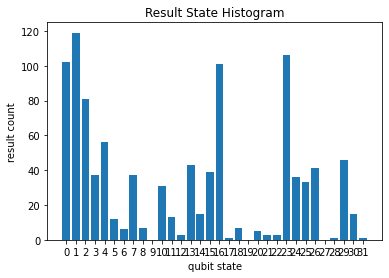

In [117]:
circuit = build_monster_grover(exponents, nDiffuse, measure=True)
s = cirq.Simulator()
samples = s.run(circuit, repetitions = numRepititions)

# get the numbers in the range of the samples
list(cirq.get_state_histogram(samples))
cirq.plot_state_histogram(samples, plt.subplot())

In [26]:
# ['a','b','c','d'][0:3]

['a', 'b', 'c']